In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPool2D, Flatten, Dense, Reshape, BatchNormalization, Dropout
batch_size = 16

170500096/170498071 [==============================] - 6s 0us/step


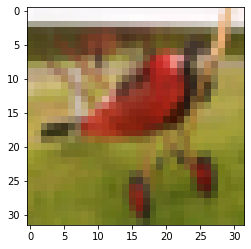

In [3]:
(train_x,train_y), (test_x,test_y) = tf.keras.datasets.cifar10.load_data()
airplanes = []
for i in range(train_x.shape[0]):
  if train_y[i] == 0:
    airplanes.append(train_x[i])
for i in range(test_x.shape[0]):
  if test_y[i] == 0:
    airplanes.append(test_x[i])
airplanes = np.array(airplanes, dtype = np.float32)
airplanes = airplanes/255
plt.imshow(airplanes[2])
airplanes = tf.data.Dataset.from_tensor_slices(airplanes).shuffle(1000)
airplanes = airplanes.batch(batch_size, drop_remainder = True).prefetch(1)

In [4]:
num_noise = 1000
generator = Sequential([
       Dense(8*8*384, input_shape = [num_noise]),
       Reshape([8,8,384]),
       BatchNormalization(),
       Conv2DTranspose(192,kernel_size = (2,2),strides = (1,1),padding = "same",activation = "selu"),
       BatchNormalization(),
       Conv2DTranspose(96,kernel_size = (2,2),strides = (1,1),padding = "same",activation = "selu"),
       BatchNormalization(),
       Conv2DTranspose(48,kernel_size = (2,2),strides = (2,2),padding = "same",activation = "selu"),
       BatchNormalization(),
       Conv2DTranspose(3,kernel_size = (2,2),strides = (2,2),padding = "same",activation = "sigmoid"),
])
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24576)             24600576  
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 384)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 384)         1536      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 192)         295104    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 192)         768       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 96)          73824     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 96)          3

In [5]:
discriminator = Sequential([
            Conv2D(64,kernel_size = (3,3),strides = (1,1), padding = "same", input_shape = [32,32,3], activation = "selu"),
            Dropout(0.3),
            MaxPool2D(),
            Conv2D(128,kernel_size = (3,3),strides = (1,1), padding = "same", activation = "selu"),
            Dropout(0.3),
            MaxPool2D(),
            Conv2D(256,kernel_size = (3,3),strides = (1,1), padding = "same", activation = "selu"),
            Dropout(0.3),
            MaxPool2D(),
            Flatten(),
            Dense(128, activation = "selu"),
            Dense(1, activation = "sigmoid")
])
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)        

In [6]:
discriminator.compile(optimizer = "rmsprop",loss = "binary_crossentropy")
discriminator.trainable = False
gan = Sequential([generator,discriminator])
gan.compile(optimizer = "rmsprop",loss = "binary_crossentropy")

In [7]:
def train_dcgan(gan, dataset, batch_size, num_noise, epochs = 5):
  generator, discriminator = gan.layers
  for epoch in range(epochs):
    print("Epoch {}/{}".format(epoch+1,epochs))
    for X_batch in dataset:
      noise = tf.random.normal(shape=[batch_size, num_noise])
      generated_images = generator(noise)
      X = tf.concat([generated_images,X_batch], axis = 0)
      y = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
      discriminator.trainable = True
      discriminator.train_on_batch(X,y)
      noise = tf.random.normal(shape=[batch_size, num_noise])
      y = tf.constant([[1.]] * batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise,y)
    noise = tf.random.normal(shape=[1, num_noise])
    image = generator(noise)
    plt.imshow(image[0])
    plt.savefig("/content/images/airplane"+str(epoch+1))
    if (epoch+1) % 100 == 0 and epoch != 0:
      gan.save("Airplane_generator"+str(epoch+1)+".h5")


Epoch 1/1000
Epoch 1/1000
Epoch 2/1000
Epoch 2/1000
Epoch 3/1000
Epoch 3/1000
Epoch 4/1000
Epoch 4/1000
Epoch 5/1000
Epoch 5/1000
Epoch 6/1000
Epoch 6/1000
Epoch 7/1000
Epoch 7/1000
Epoch 8/1000
Epoch 8/1000
Epoch 9/1000
Epoch 9/1000
Epoch 10/1000
Epoch 10/1000
Epoch 11/1000
Epoch 11/1000
Epoch 12/1000
Epoch 12/1000
Epoch 13/1000
Epoch 13/1000
Epoch 14/1000
Epoch 14/1000
Epoch 15/1000
Epoch 15/1000
Epoch 16/1000
Epoch 16/1000
Epoch 17/1000
Epoch 17/1000
Epoch 18/1000
Epoch 18/1000
Epoch 19/1000
Epoch 19/1000
Epoch 20/1000
Epoch 20/1000
Epoch 21/1000
Epoch 21/1000
Epoch 22/1000
Epoch 22/1000
Epoch 23/1000
Epoch 23/1000
Epoch 24/1000
Epoch 24/1000
Epoch 25/1000
Epoch 25/1000
Epoch 26/1000
Epoch 26/1000
Epoch 27/1000
Epoch 27/1000
Epoch 28/1000
Epoch 28/1000
Epoch 29/1000
Epoch 29/1000
Epoch 30/1000
Epoch 30/1000
Epoch 31/1000
Epoch 31/1000
Epoch 32/1000
Epoch 32/1000
Epoch 33/1000
Epoch 33/1000
Epoch 34/1000
Epoch 34/1000
Epoch 35/1000
Epoch 35/1000
Epoch 36/1000
Epoch 36/1000
Epoch 37/1

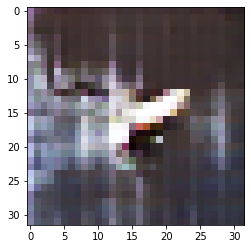

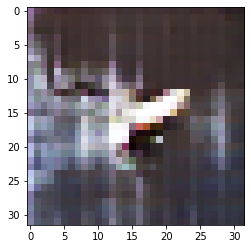

In [9]:
train_dcgan(gan,airplanes,batch_size,num_noise,epochs = 1000)